# Tathagata Mookherjee<br>
ROLL NUMBER - M21AI619<br>
CSL7590 Deep Learning, Assignment 3<br>
IIT JODHPUR<br>

1. Implement the Sparse auto-encoders (AE). Use the MNIST digit dataset for training your network. Perform the k-means clustering on the embeddings. To evaluate the performance of the k-means algorithm, use the available labels in the dataset.<br>
Dataset: http://yann.lecun.com/exdb/mnist/<br>
[15 Marks]<br>

# Definitions
A Sparse Autoencoder is a type of autoencoder that employs sparsity to achieve an information bottleneck.<br>
<br>
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.<br>

Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from keras import losses
from keras import Input
from keras.layers import Dense
from keras.models import Model
import os
import torch

if the model folder does not exist then create it

In [2]:
if not os.path.exists('SAEModel'):
    os.makedirs('SAEModel')

download the dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

display 10 random images from training set

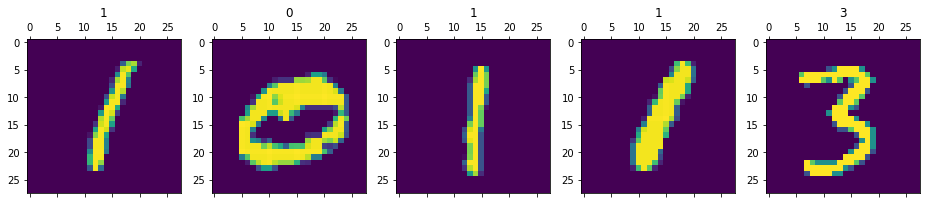

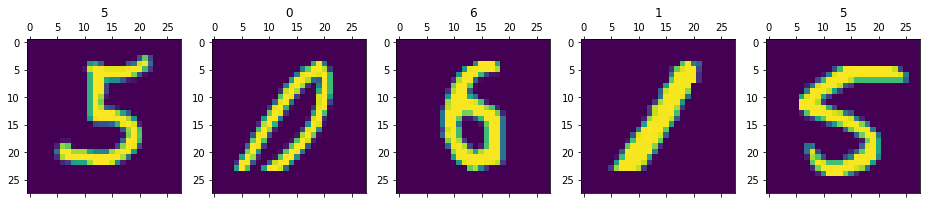

In [4]:
figure, axis = plt.subplots(1,5, figsize=(16, 9))
n = random.randint(0, 6000)

for i in range(0,5):
  axis[i].matshow(X_train[n])
  axis[i].set(title = Y_train[n])
  n += 1

figure, axis = plt.subplots(1,5, figsize=(16, 9))
n = random.randint(0, 6000)

for i in range(0,5):
  axis[i].matshow(X_train[n])
  axis[i].set(title = Y_train[n])
  n += 1

plt.show()

display 10 random images from test set

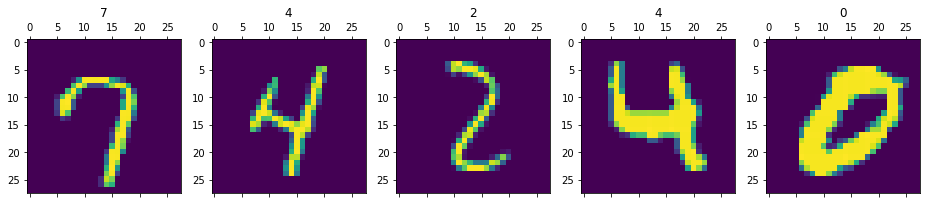

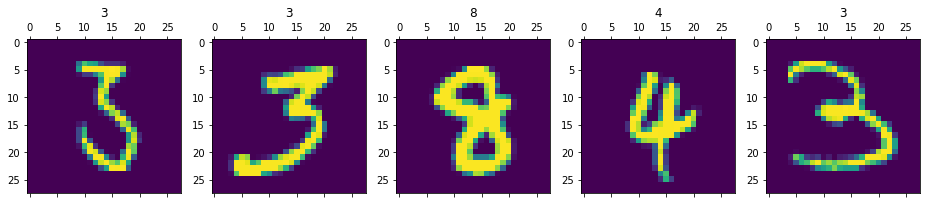

In [5]:
figure, axis = plt.subplots(1,5, figsize=(16, 9))
n = random.randint(0, 6000)

for i in range(0,5):
  axis[i].matshow(X_test[n])
  axis[i].set(title = Y_test[n])
  n += 1

figure, axis = plt.subplots(1,5, figsize=(16, 9))
n = random.randint(0, 6000)

for i in range(0,5):
  axis[i].matshow(X_test[n])
  axis[i].set(title = Y_test[n])
  n += 1

plt.show()

flatten the images

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype("float32") / 255

defining the model and running it using training data

In [7]:
var_input_neurons=784 
var_epochs=50
var_L1=0.0001
var_units=16

input  = Input(shape = X_train.shape[1], name = 'Input_Layer')
encoder = Dense(var_units, activation='relu', name = 'Encoder_layer')(input)
bottleneck = Dense(var_units, activation='relu', activity_regularizer = tf.keras.regularizers.L1(var_L1), name = 'Bottleneck_layer')(encoder)
decoder = Dense(var_units, activation='relu', name = 'Decoder_layer')(bottleneck)
output = Dense(var_input_neurons, activation='sigmoid', name = 'Output_layer')(decoder)
model = Model(inputs= input, outputs= output, name='Autoencoder-Model')
model.compile(optimizer='adam', loss=losses.MeanSquaredError())
model_history = model.fit(X_train, X_train, epochs = var_epochs, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
1875/1875 [==============================] - 26s 12ms/step - loss: 0.0544 - val_loss: 0.0392
Epoch 2/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0359 - val_loss: 0.0334
Epoch 3/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0321 - val_loss: 0.0303
Epoch 4/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0301 - val_loss: 0.0292
Epoch 5/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0294 - val_loss: 0.0288
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0289 - val_loss: 0.0284
Epoch 7/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0286 - val_loss: 0.0280
Epoch 8/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0283 - val_loss: 0.0279
Epoch 9/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0281 - val_loss: 0.0276
Epoch 10/50
1875/1875 [==============================] - 39s 21ms/s

save the model

In [8]:
model.save("SAEmodel")

INFO:tensorflow:Assets written to: SAEmodel\assets


INFO:tensorflow:Assets written to: SAEmodel\assets


plot the loss curve

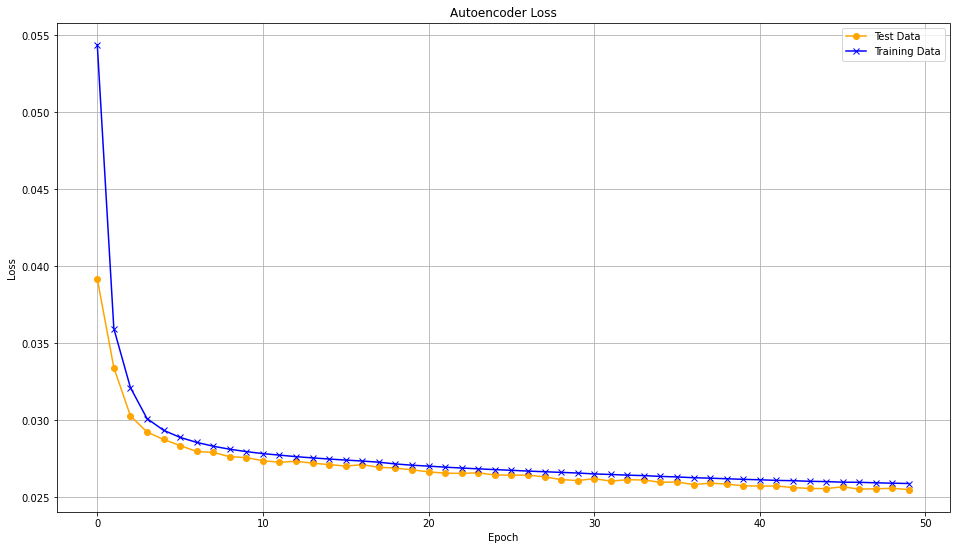

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.title(label='Autoencoder Loss')
ax.plot(model_history.history['val_loss'], label='Test Data', color='orange', marker = 'o')
ax.plot(model_history.history['loss'], label='Training Data', color='blue', marker = 'x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

evaluating the model against the training and test data

In [10]:
print('evaluating model against training data..')
model.evaluate(X_train, Y_train, verbose=1)
print('done..')

print('evaluating model against test data..')
model.evaluate(X_test, Y_test, verbose=1)
print('done..')

print('create a new model from saved SAEmodel..')
new_model = tf.keras.models.load_model("SAEmodel")
print('done..')

print('evaluating the new model against test data..')
new_model.evaluate(X_test, Y_test, verbose = 1)
print('done..')


evaluating model against training data..
1875/1875 [==============================] - 10s 5ms/step - loss: 27.0980
done..
evaluating model against test data..
313/313 [==============================] - 2s 5ms/step - loss: 27.0268
done..
create a new model from saved SAEmodel..
done..
evaluating the new model against test data..
313/313 [==============================] - 2s 6ms/step - loss: 27.0268
done..


As we can see the training loss and testing loss are very similar indicating a good fit